In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [175]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [177]:
df.duplicated().sum()

0

In [178]:
df=df.drop(["Serial No."],axis=1)

In [179]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [181]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [182]:
X,y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 495        332          108                  5  4.5   4.0  9.02         1
 496        337          117                  5  5.0   5.0  9.87         1
 497        330          120                  5  4.5   5.0  9.56         1
 498        312          103                  4  4.0   5.0  8.43         0
 499        327          113                  4  4.5   4.5  9.04         0
 
 [500 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

In [227]:
scale=MinMaxScaler()

In [228]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [229]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [231]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [232]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [233]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [238]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0093 - val_accuracy: 0.0000e+00 - val_loss: 0.0107
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0085 - val_accuracy: 0.0000e+00 - val_loss: 0.0104
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0082 - val_accuracy: 0.0000e+00 - val_loss: 0.0100
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0087 - val_accuracy: 0.0000e+00 - val_loss: 0.0097
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0078 - val_accuracy: 0.0000e+00 - val_loss: 0.0093
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0082 - val_accuracy: 0.0000e+00 - val_loss: 0.0090
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0072 - val_accuracy: 0.0000e+00 - val_loss: 0.0086
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [239]:
from sklearn.metrics import r2_score

In [240]:
y_pred = model.predict(X_test_scaled).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [197]:
y_pred.shape,y_test.shape

((150,), (150,))

In [241]:
r2_score(y_test,y_pred)

0.7170789928408374

In [244]:
import matplotlib.pyplot as plt

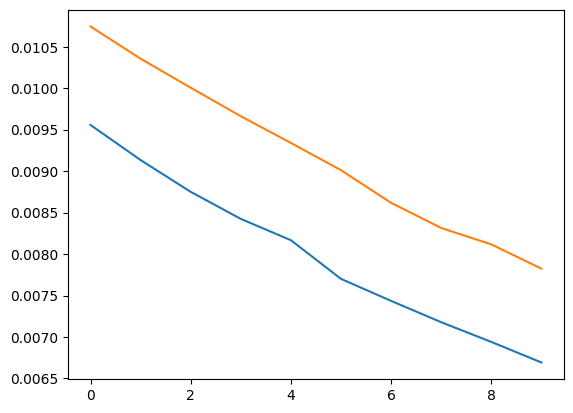

In [246]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])